<center>
    <img src="https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif" alt="Institute Logo">
</center>

<center><h1><b>Work Integrated Learning Programmes Division M.Tech(AIML)</b></h1></center>
<center><h2><b>Machine Learning</b></h2></center>
<center><h3><b>S2-22_AIMLCZG565</b></h3></center>
<center><h4><b>Assignment 2 – PS-5</b></h4></center>

 ## Group No 96

### **Group Members:**

- Biswadeep Upadhyay (2022ac05114)
- Tejovardhan Medamarti (2022ac05124)

### Problem Statement ###
The given dataset shows the plant classification ML problem. The task is to predict the
class of the plant based on certain features given in the excel file.<P> The xlsx has 2 components
one showing the variables data and another file showing the explanation of what each of these
variables mean.. The task is to fit a Random Forest and k-Nearest Neighbors (KNN) Machine
Learning algorithm.<P>
For this problem, ignore the problem metrics. Ignore the units of tree length like mm or cm.
For e.g. do not think that the tree length is in mm or cm. All the measures are metric-less (unit
less) and for this problem treat each column in that capacity.

### **DATASET: Plant_Tree_data.xlsx **

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries/ Dataset
## Import Libraries

In [82]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from typing import Optional, List, Dict
from __future__ import annotations



from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder
# #standardising the normal feature set - scaling
# #feature extraction and standardisarion/normalisartion
# from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler


## Import Dataset
Note: Please make sure to mount the google drive, before executing the below step.

In [83]:
df_plant_trees = pd.read_excel('/content/drive/MyDrive/Semester1/ML/Assignment2/Plant_Tree_data.xlsx')
df_plant_trees.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Exploratory Data Analysis (EDA)

###Data Visualization and Exploration of yeast dataset

- Print 2 rows for sanity check to identify all the features present in the dataset and if the
target matches with them.
- Comment on class imbalance with appropriate visualization method.
- Provide appropriate visualizations to get an insight about the dataset.
- Do the correlational analysis on the dataset. Provide a visualization for the same. Will
this correlational analysis have effect on feature selection that you will perform in the
next step? Justify your answer. Answer without justification will not be awarded
marks.
- Any other visualisation specific to the problem statement

In [84]:
df_plant_trees.head(2)

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


 - Info method helps to find the schema details of the pandas dataframe.

In [85]:
df_plant_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeafLength          17898 non-null  float64
 1   LeafBreadth         17898 non-null  float64
 2   ErrorLeafLength     17898 non-null  float64
 3   ErrorLeafBreadth    17898 non-null  float64
 4   LeafCurveAngle      17898 non-null  float64
 5   EdgeCurvatureAngle  17898 non-null  float64
 6   ErrorLeafCurvature  17898 non-null  float64
 7   TreeLength          17898 non-null  float64
 8   TreeType            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


 - Shape method  provide the number of row and columns of the given dataset.

In [86]:
#number of records x features
df_plant_trees.shape

(17898, 9)

In [87]:
df_plant_trees.dtypes.value_counts()

float64    8
int64      1
dtype: int64

- Below table will show the name distribution in the plant_trees dataset. We can clearly the data is not equally distributed and does have the skewness.

In [88]:
#multi-class varification - class imbalance
df_plant_trees["TreeType"].value_counts()

0    16259
1     1639
Name: TreeType, dtype: int64

- Below code will help in finding the unqique values in the name attribute.

In [89]:
number_of_classes = df_plant_trees.nunique()['TreeType']
number_of_classes

2

- Below is the 5 point summary table, which will help us in identifying the data distribution.

In [90]:
df_plant_trees.describe()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


- Below code, will help us in identifying the data attributes having any NULLs/ NAN in the dataset. This is one of the important analysis for any given dataset.

In [91]:
#null check
df_plant_trees.isnull().sum()

LeafLength            0
LeafBreadth           0
ErrorLeafLength       0
ErrorLeafBreadth      0
LeafCurveAngle        0
EdgeCurvatureAngle    0
ErrorLeafCurvature    0
TreeLength            0
TreeType              0
dtype: int64

In [92]:
columns = df_plant_trees.columns

categorical_columns = list(df_plant_trees.dtypes[df_plant_trees.dtypes == 'object'].index)
numerical_columns = [c for c in columns if c not in categorical_columns]
categorical_columns, numerical_columns

([],
 ['LeafLength',
  'LeafBreadth',
  'ErrorLeafLength',
  'ErrorLeafBreadth',
  'LeafCurveAngle',
  'EdgeCurvatureAngle',
  'ErrorLeafCurvature',
  'TreeLength',
  'TreeType'])

 - Since we are dealing with the logistic regression, our target variable is the name class. Below code, will help us in identifying the no of catogories avaialable in the name attribute.

In [93]:
features = numerical_columns
label = ['TreeType'] #categorical_columns[0]
features, label

(['LeafLength',
  'LeafBreadth',
  'ErrorLeafLength',
  'ErrorLeafBreadth',
  'LeafCurveAngle',
  'EdgeCurvatureAngle',
  'ErrorLeafCurvature',
  'TreeLength',
  'TreeType'],
 ['TreeType'])

### Data Visualisation

Data visualization plays an important role in Machine learning to understand the data distribution.

In [94]:
class_counts = df_plant_trees["TreeType"].value_counts()
class_counts

0    16259
1     1639
Name: TreeType, dtype: int64

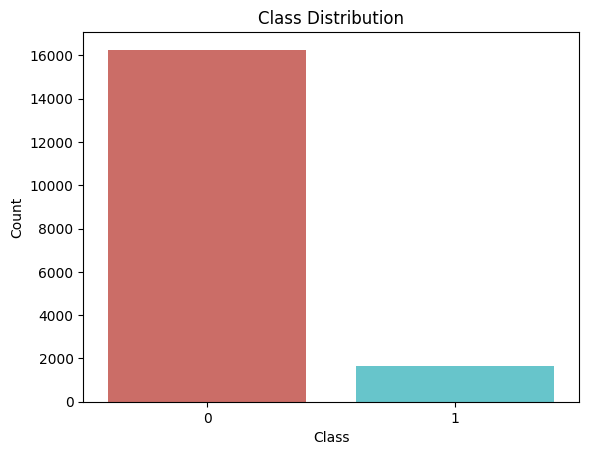

In [95]:
sns.countplot(x='TreeType', data=df_plant_trees, palette ='hls')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


- Below pie chart will help us understanding how the data is distributed by our target variable **(name)** which contains multi class labels. (For example, CYT consumes 31.2% of the whole distribution).

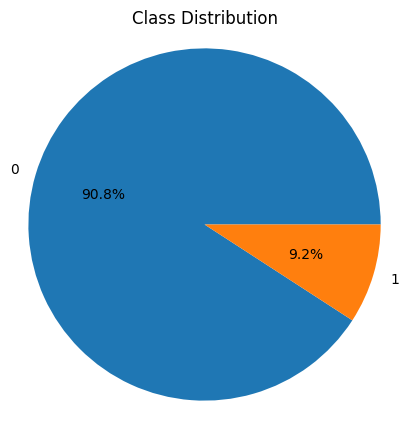

In [96]:
#pie chart
# Plot the class distribution as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

In [97]:
print(features)

['LeafLength', 'LeafBreadth', 'ErrorLeafLength', 'ErrorLeafBreadth', 'LeafCurveAngle', 'EdgeCurvatureAngle', 'ErrorLeafCurvature', 'TreeLength', 'TreeType']


 - Identifying noise in the dataset is very challenging task for any machine learning program. *Outliers* help us to identify the data in the normal distribution. Fixing outliers requires domain knowledge and understanding of the dataset. Since our dataset is very small in nature, we will just specify the  data skewness and the outlier data will not be removed. Examples given below.

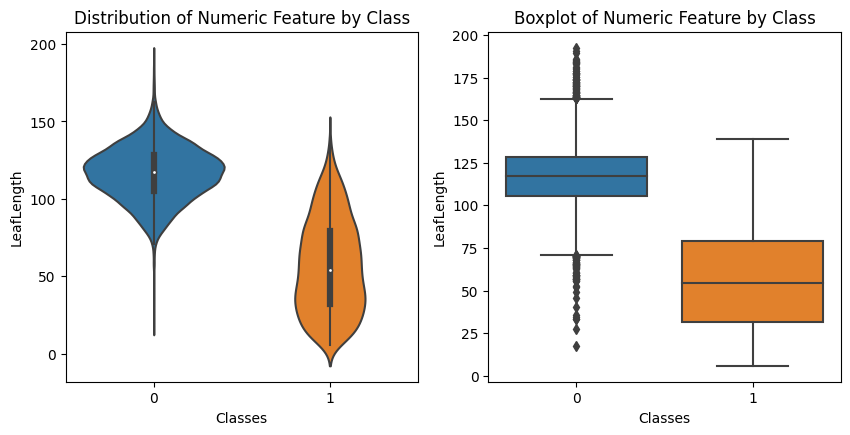

In [98]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.violinplot(data=df_plant_trees, x='TreeType', y=features[0])
plt.xlabel('Classes')
plt.ylabel(features[0])
plt.title('Distribution of Numeric Feature by Class')
plt.subplot(2,2,2)
sns.boxplot(data=df_plant_trees, x='TreeType', y=features[0])
plt.xlabel('Classes')
plt.ylabel(features[0])
plt.title('Boxplot of Numeric Feature by Class')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


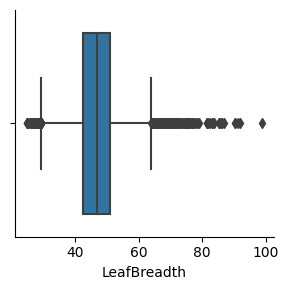

In [99]:
g = sns.FacetGrid(df_plant_trees)
g.map(sns.boxplot, features[1]);


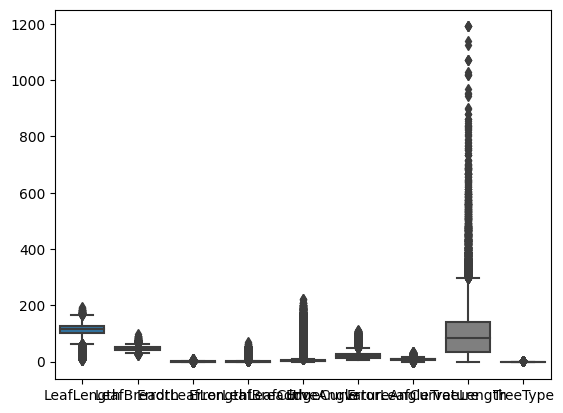

In [100]:
sns.boxplot(df_plant_trees)
plt.show()

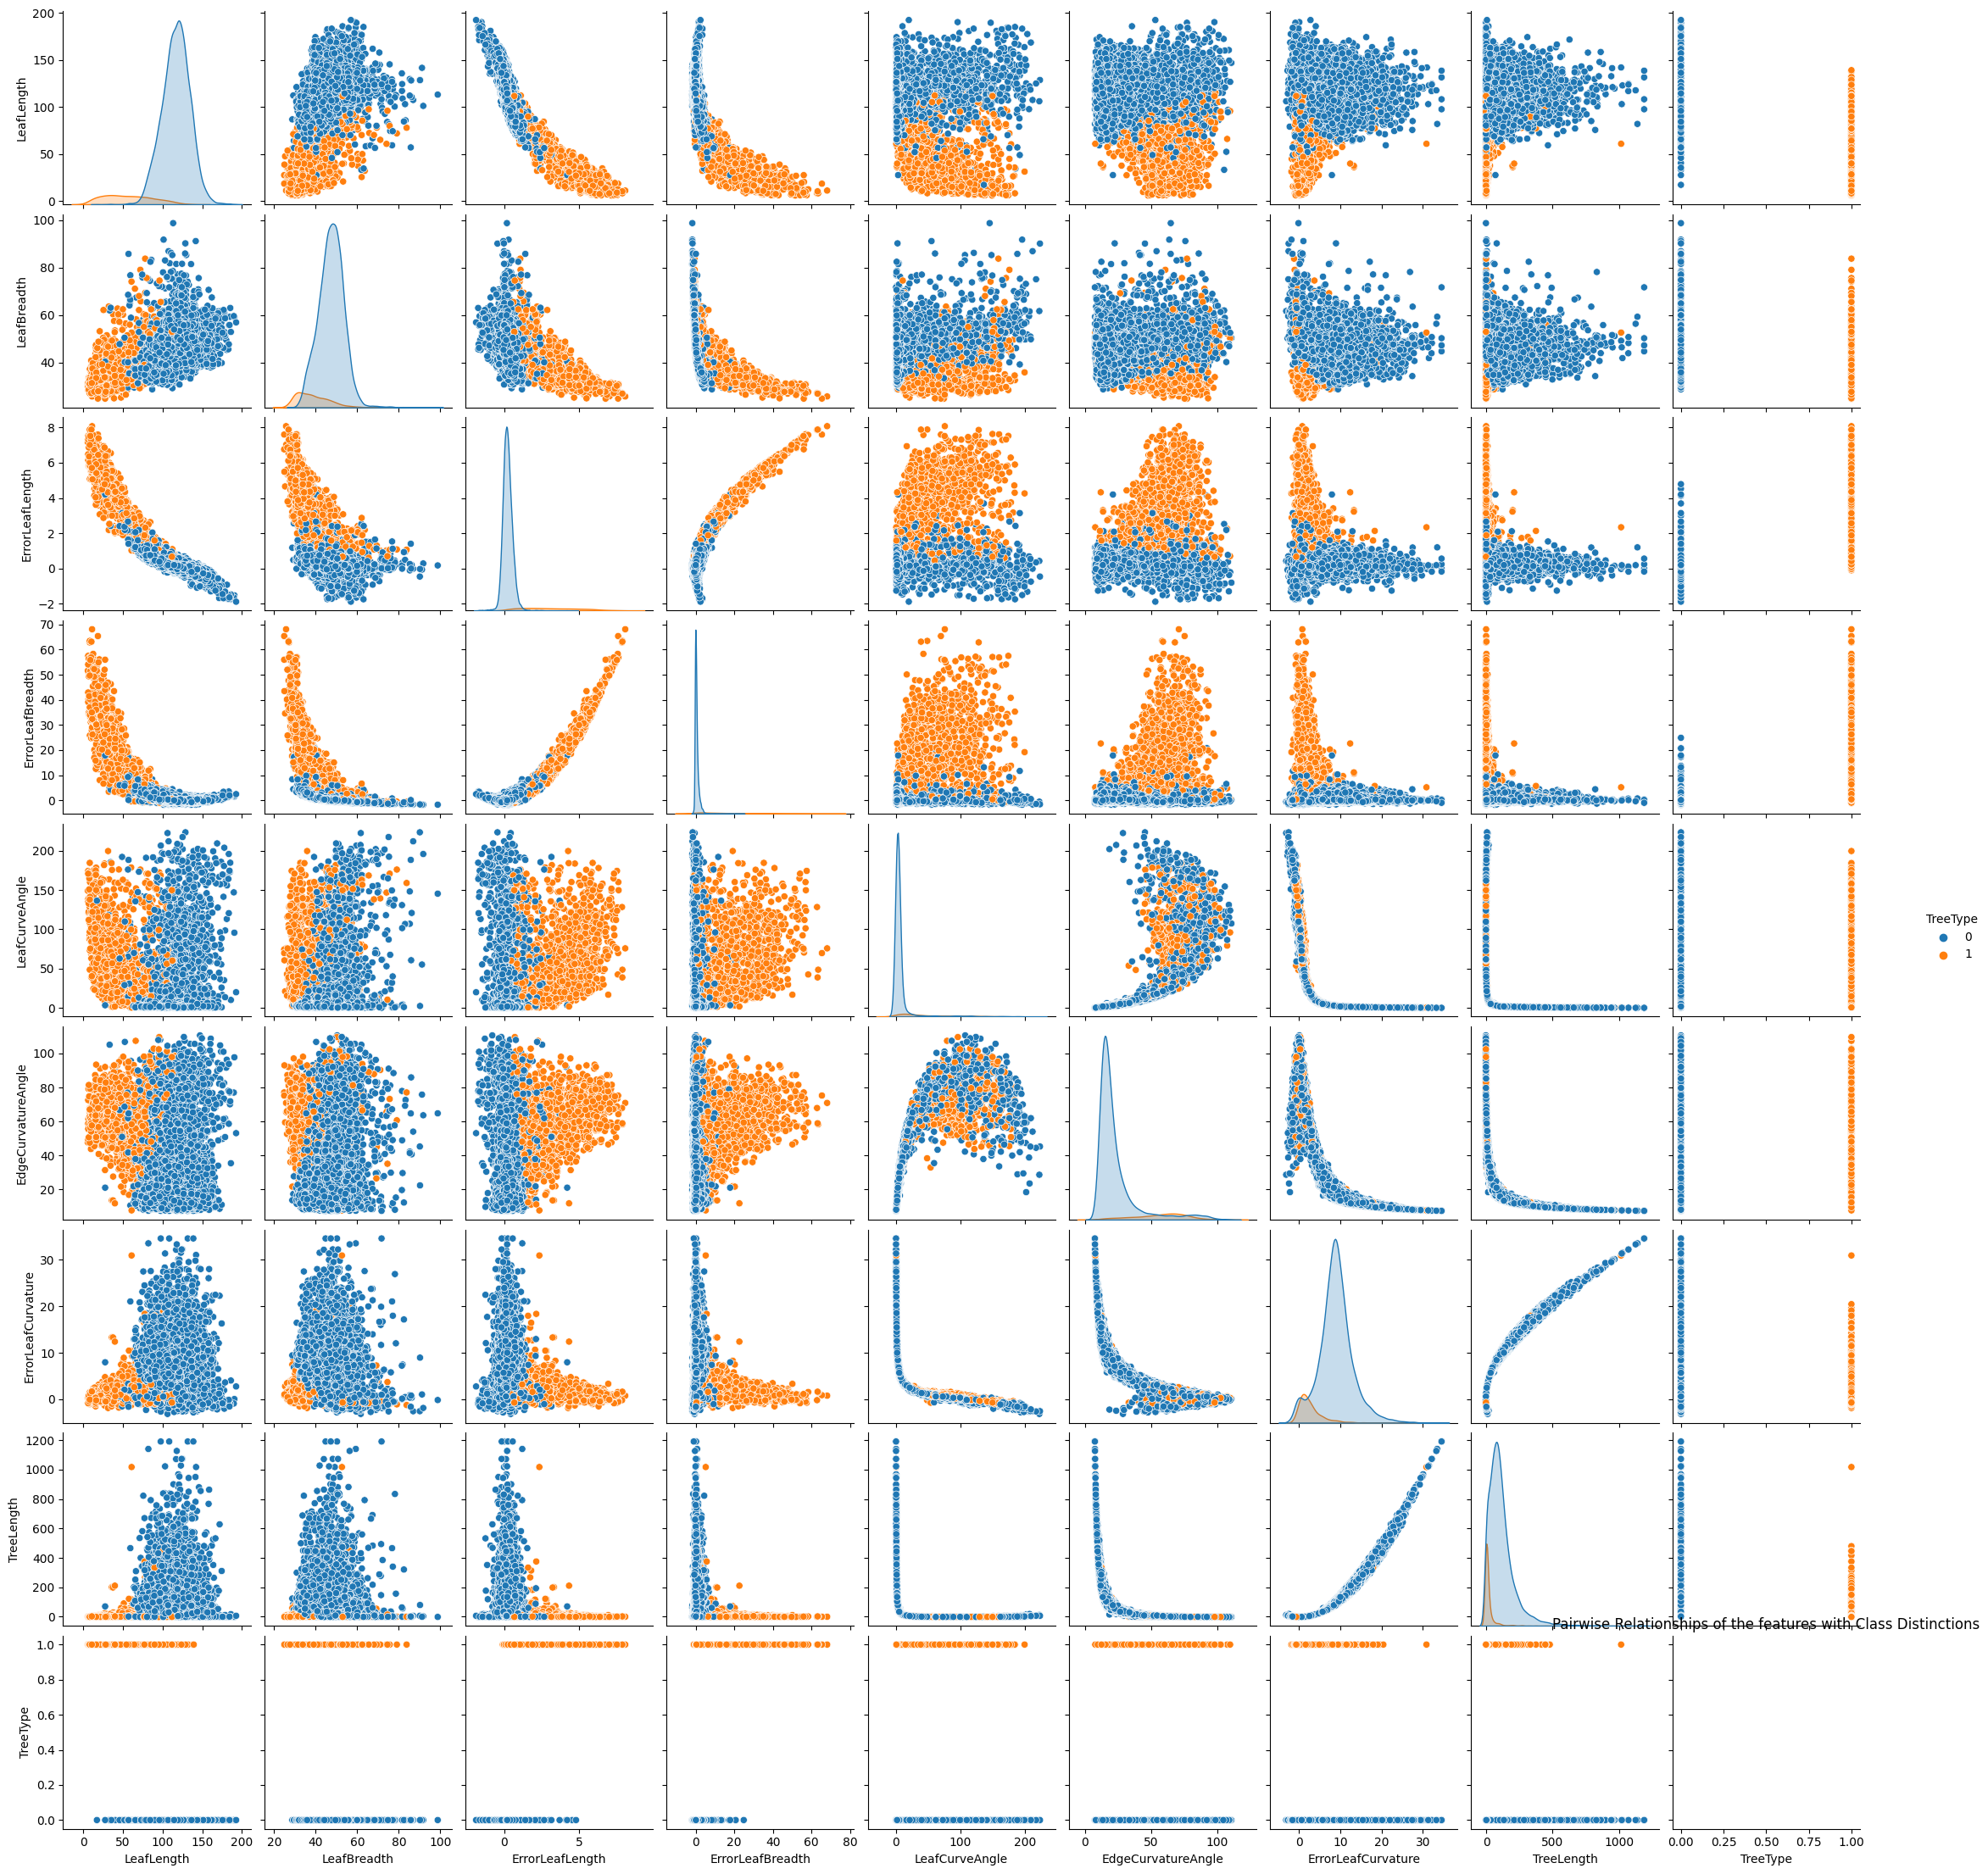

In [101]:
sns.pairplot(data=df_plant_trees, vars=features, hue='TreeType')
plt.title('Pairwise Relationships of the features with Class Distinctions')
plt.show()

* mutual information - to measure the importance of categorical variables
* correlation - to measure the importance of numeric variables

### correlation

* The r value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.

* from 2 strongly correlated features we can skip one, features which are very weekly correlated should be picked.

* From the below correlation analysis, we can clearly see that  ***the feature gvh and mcg*** has higher correlation values when compared with the other features.

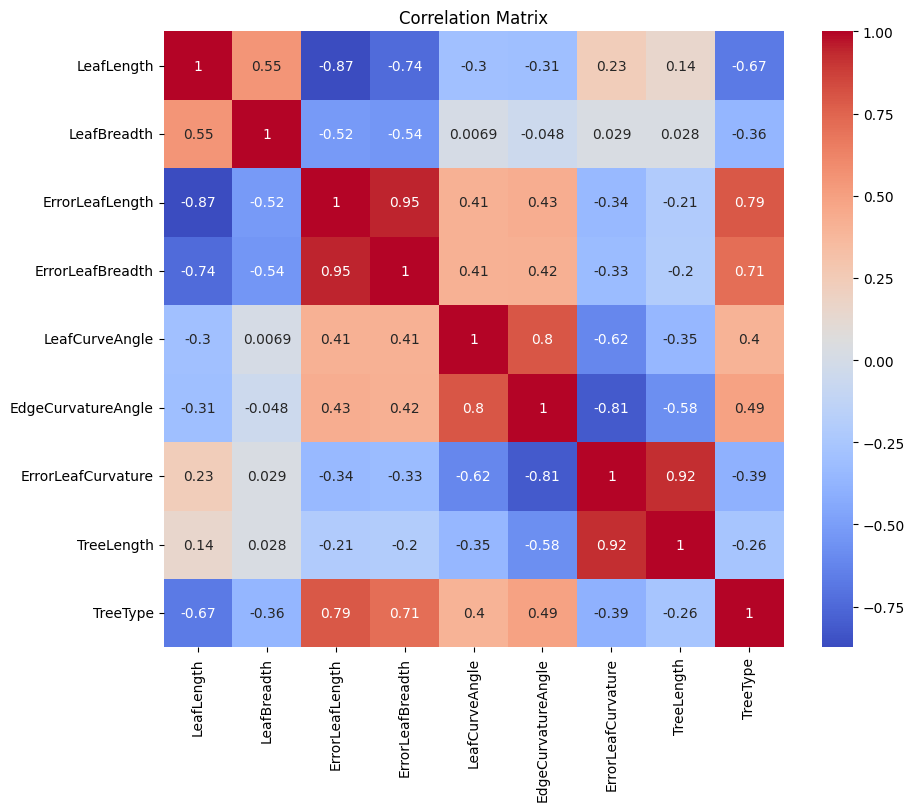

In [102]:
## correlation
# Calculate the correlation matrix
correlation_matrix = df_plant_trees[features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing and Cleansing

1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if
any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks
and its effect on model evaluation parameters.
2. Apply appropriate feature engineering techniques for them. Apply the feature
transformation techniques like Standardization, Normalization, etc. You are free to apply
the appropriate transformations depending upon the structure and the complexity of your
dataset. Provide proper justification. Techniques used without justification will not be
awarded marks. Explore few techniques for identifying feature importance for your
feature engineering task.

- Below feature columns does not have any Null/ NAN values. Hence no action requried to replace to remove the existing data.

In [103]:
## finding missing values
df_plant_trees.isna().sum()

LeafLength            0
LeafBreadth           0
ErrorLeafLength       0
ErrorLeafBreadth      0
LeafCurveAngle        0
EdgeCurvatureAngle    0
ErrorLeafCurvature    0
TreeLength            0
TreeType              0
dtype: int64

## Dealing with the outliers
* We can use the interquartile range (IQR) to identify and remove any outlier data points that are beyond a certain number of standard deviations from the mean. This is done using the following steps:
1. Calculate the first quartile ***Q1***, which is the median of the lower half
of the dataset.
2. Calculate the third quartile ***Q3***, also known as the "75th
percentile", or Tukey's fence, which is the median of the upper half of the
dataset.
3. Find the difference between these two quartiles, called ***IQR***.
4. Define an allowable margin for error in terms of multiples of the IQR
above/below each quartile value.
For example, if you want your errors to be
no more than one quarter outside the boxplot whiskers, set this limit at ±
- lower_lim = Q1 - 1.5 * IQR
- upper_lim = Q3 + 1.5 * IQR


In [104]:
df_plant_trees.describe()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [105]:
df_plant_trees_without_outlier = df_plant_trees.copy()

In [106]:
for feature in features:
    #calculating outlier for features
    Q1 = df_plant_trees[feature].quantile(0.25)
    Q3 = df_plant_trees[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    lower_lim, upper_lim

    # removing outliers
    lower_outliers = (df_plant_trees[feature] < lower_lim)
    higher_outliers = (df_plant_trees[feature] > upper_lim)
    df_plant_trees_without_outlier[feature] = df_plant_trees[feature][~(lower_outliers | higher_outliers)]

In [107]:
df_plant_trees_without_outlier.shape

(17898, 9)

In [108]:
df_plant_trees_without_outlier.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


In [109]:
df_plant_trees_without_outlier.isnull().sum()

LeafLength            1030
LeafBreadth            262
ErrorLeafLength       1596
ErrorLeafBreadth      1901
LeafCurveAngle        2927
EdgeCurvatureAngle    2346
ErrorLeafCurvature     487
TreeLength             901
TreeType              1639
dtype: int64

In [110]:
df_plant_trees_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeafLength          16868 non-null  float64
 1   LeafBreadth         17636 non-null  float64
 2   ErrorLeafLength     16302 non-null  float64
 3   ErrorLeafBreadth    15997 non-null  float64
 4   LeafCurveAngle      14971 non-null  float64
 5   EdgeCurvatureAngle  15552 non-null  float64
 6   ErrorLeafCurvature  17411 non-null  float64
 7   TreeLength          16997 non-null  float64
 8   TreeType            16259 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### Balancing Technique

The effect of data balancing on model evaluation parameters:
Data balancing techniques are often used when dealing with imbalanced datasets, where one class is significantly underrepresented compared to others. Some common data balancing techniques include:

* Undersampling: Randomly removing instances from the majority class to balance the dataset.
* Oversampling: Generating synthetic samples for the minority class to balance the dataset.
* SMOTE (Synthetic Minority Over-sampling Technique): Creating synthetic samples for the minority class by interpolating between existing samples.



### Objective: Split the data frame into Train and Test:
- Split of training and test data:
- The stratify parameter will ensure that the train and test split has the same class distribution ratio as the original dataset.
- It is crucial in the case of imbalanced datasets.
Otherwise, it might happen that the training data only consists of the majority class.
Below listed functions has been applied as part of the feature engineering.


###Standardizing Techniques:
-- Models like Logistic Regression, require the data to be appropriately scaled to perform well. We have couple of methods to standardize:
  - DictVectorizer
  - StandardScaler

In this case, we have chosen, ***StandardScaler()*** for the model build.

Because we are dealing with the categorical variables for the multi class classification, and for the model to perform well, we are converting the labels into numerical format.
Below are the methods that can be used to convert the Target variables.

- OneHotEncoder()
- LabelEncoder()
- LabelBinarizer()



### Dealing with class imbalances ###
Oversampling is one of the most widely used techniques to deal with imbalance classes.
To briefly explain the concept, we generate synthetic samples for minority classes to make sure we have enough data to train the model. Here we are using SMOTE for oversampling.

### Defintion declarations:
1. **get_X_y()**: Will be used to split the data frame along with the encoding the features and target variable (*name*).
2. **get_model()**: To get the logistic regression model, depending on the various input parameters on multi classification. *It Supports regularization also.*
3. **evaluate_model()**: This function will test the performance of the model including ***K-Fold cross validation***.

In [111]:
def standardize_data(X_train_r,X_test_r,feature_encoding_technique):
  #standardising the normal feature set - scaling
  #feature extraction and standardisarion/normalisartion
  from sklearn.feature_extraction import DictVectorizer
  from sklearn.preprocessing import StandardScaler

  if feature_encoding_technique == 'scale':
          scaler = StandardScaler()
          X_train_en = scaler.fit_transform(X_train_r)
          X_test_en = scaler.transform(X_test_r)
  elif feature_encoding_technique == 'vector':
          dv  = DictVectorizer(sparse=False)
          train_dict = X_train_r.to_dict(orient='records')
          X_train_en = dv.fit_transform(train_dict)

          test_dict = X_test_r.to_dict(orient='records')
          X_test_en = dv.transform(test_dict)

  else:
          return -1

  print("Feature Extraction/standardisation complete.")
  return X_train_en,X_test_en



In [112]:
def encode_target_data(target_encoding_technique,y_train_r,y_test_r):
  #target_encoding
  from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder

  onehot_encoder = OneHotEncoder()
  label_encoder = LabelEncoder()
  label_binder = LabelBinarizer()


  if target_encoding_technique == 'none':
          y_train_en = y_train_r.values
          y_test_en = y_test_r.values
  elif target_encoding_technique == 'onehot':
          y_train_en = onehot_encoder.fit_transform(y_train_r.values.reshape(-1,1)).toarray()
          y_test_en = onehot_encoder.transform(y_test_r.values.reshape(-1,1)).toarray()
  elif target_encoding_technique == 'label':
          y_train_en = label_encoder.fit_transform(y_train_r.values)
          y_test_en = label_encoder.transform(y_test_r.values)
  elif target_encoding_technique == 'binary':
          y_train_en = label_binder.fit_transform(y_train_r.values)
          y_test_en = label_binder.transform(y_test_r.values)

  else:
          #label encoding with float output
          y_train_en = label_encoder.fit_transform(y_train_r.values).astype('float64')
          y_test_en = label_encoder.transform(y_test_r.values).astype('float64')
  return y_train_en, y_test_en


In [113]:
def apply_smote_technique(sampling_neighbors, X_train_en,y_train_en ):
  ## resampling : oversampling using SMOTE
  from imblearn.over_sampling import SMOTE
  sm = SMOTE(random_state=2, k_neighbors=sampling_neighbors)
  X_train_res, y_train_res = sm.fit_resample(X_train_en, y_train_en)
  return X_train_res, y_train_res

In [114]:
# function to get feature and label for training Model
def get_X_y(data: pd.DataFrame,
            features : List[str],
            label: str,
            test_split_ratio: float = 0.2,
            sampling_technique: str = 'smote',
            sampling_neighbors: int = 1,
            feature_encoding_technique: str = 'scale',
            target_encoding_technique: str = 'label') -> Optional[List[np.array, np.array, np.array, np.array]]:



        X_full = data.drop(label,axis=1)
        y_full = df_plant_trees[label]

        # split into Train-Test sets with a ratio specified by user (default is 80:20)
        #split of train and test dataset
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_full, y_full, test_size=test_split_ratio, random_state=42, stratify=y_full)

        print(f'Shape of Training Data set: X: {X_train_r.shape}, y: {y_train_r.shape}')
        print(f'Shape of Testing Data set: X: {X_test_r.shape}, y: {y_test_r.shape}')

        X_train_en,X_test_en = standardize_data(X_train_r,X_test_r,feature_encoding_technique)

        y_train_en, y_test_en =encode_target_data(target_encoding_technique,y_train_r,y_test_r)

        print("Encoding of target variable is complete.")

        #re-sampling to handle class imbalance on training data

        if sampling_technique == 'smote':
          X_train_res, y_train_res= apply_smote_technique(sampling_neighbors, X_train_en,y_train_en )
          print(f'Resampling of training data using {sampling_technique} is complete.')
          print(f'Shape of resampled training data set: X: {X_train_res.shape}, y: {y_train_res.shape}')
        else:
          print('Resampling ignored.')
          X_train_res, y_train_res = X_train_en, y_train_en

        return X_train_res, X_test_en, y_train_res, y_test_en


Where X is the Feature numerical data of all correlating features while Y is the target data that is area here

**Randonmness**: Using a fixed seed value like 42 ensures that the random processes in the code will produce the same results each time when we run it.

no specific reason for using the term 42 , but it was popularized in "The Hitchhiker's Guide to the Galaxy" for randomness and used in most of the machine learning models

the randomness just need to be consistent across the code

In [115]:
def set_param_grid(n_estimators_list,criterion_list,max_depth_list,
                   min_samples_split_list,min_samples_leaf_list,
                   max_features_list):

  params_grid = {
      'n_estimators': n_estimators_list,
      'criterion': criterion_list,
      'max_depth': max_depth_list,
      'min_samples_split': min_samples_split_list,
      'min_samples_leaf': min_samples_leaf_list,
      'max_features': max_features_list
  }

  num_combinations = 1
  for k in params_grid.keys(): num_combinations *= len(params_grid[k])

  print('Number of combinations = ', num_combinations)
  return params_grid




```
# Create a Random Forest Model definition
```



In [116]:
def my_roc_auc_score(model,X_train,y_train): return roc_auc_score(y_train, model.predict(X_train))

In [117]:
def train_rf_model_randomsearch(X_train,y_train,params_grid, n_iter, crs_valid_cnt, my_roc_auc_score):
  model_rf_rs = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=n_iter,
                              cv=crs_valid_cnt,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=2)
  model_rf = model_rf_rs.fit(X_train,y_train)
  return model_rf

In [118]:
def train_rf_model_GridsearchCV(X_train,y_train,params_grid,
                                crs_valid_cnt, my_roc_auc_score):

  model_rcgs = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                        param_grid=params_grid,
                        cv=crs_valid_cnt,
                        scoring=my_roc_auc_score,
                        return_train_score=True,
                        verbose=4)
  model_rf =model_rcgs.fit(X_train,y_train)
  return model_rf

In [119]:
def train_knn_model_GridsearchCV(X_train,y_train,crs_valid_cnt):
  knn = KNeighborsClassifier()
  k_range = list(range(1, 31))
  param_grid = dict(n_neighbors=k_range)

  # defining parameter range
  grid = GridSearchCV(knn, param_grid, cv=crs_valid_cnt, scoring='accuracy', return_train_score=True,verbose=1)

  # fitting the model for grid search
  grid_search=grid.fit(X_train,y_train)
  return grid_search


In [120]:
def train_random_forest_final(X_train,y_train, criterion, max_depth, max_features,min_samples_leaf,min_samples_split,n_estimators):
  classifier_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion=criterion,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      min_samples_leaf=min_samples_leaf,
                                      min_samples_split=min_samples_split,
                                      n_estimators=n_estimators)
  model_fin = classifier_fin.fit(X_train,y_train)
  return model_fin

In [121]:
def train_KNNClassifier_final(X_train,y_train, n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  model_knn = knn.fit(X_train, y_train)
  return model_knn

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Specifiy the range of value for some important hyper parameters

In [123]:
def rf_estimators():
  y_train_prob_tree = np.stack([model.predict_proba(X_test)[:,1]for m in model.estimators_])


In [124]:
def evaluate_model(
        model: Optional[RandomForestClassifier],
        X_train: Optional[np.array],
        X_test: Optional[np.array],
        y_train: Optional[np.array],
        y_test: Optional[np.array],
        k_fold: int = 10
) -> None:

        # training the model with traing dataset.
        model.fit(X_train, y_train)
        print('Model trained with training dataset')

        #testing model against testing datseet
        y_pred_proba_test = model.predict_proba(X_test)
        y_pred_test = model.predict(X_test)

        print(f'Accuracy score on testing dataset: {accuracy_score(y_test, y_pred_test)}')

        print(f'ROC AUC Score on testing dataset: {roc_auc_score(y_test, y_pred_proba_test[:,1], multi_class="ovr")}')

        #testing model against training datseet
        y_pred_proba_train = model.predict_proba(X_train)
        y_pred_train = model.predict(X_train)
        print(f'Accuracy score on training dataset: {accuracy_score(y_train, y_pred_train)}')
        print(f'ROC AUC Score on training dataset: {roc_auc_score(y_train, y_pred_proba_train[:,1], multi_class="ovr")}')

        # # Repeating same code
        # y_train_prob_tree = np.stack([y_pred_proba_train[:,1] for m in model.estimators_])
        # y_valid_prob_tree = np.stack([y_pred_proba_test[:,1] for m in model.estimators_])
        # num_trees = 1600

        # # Find AUC for different levels of Trees
        # train_auc_trees = [roc_auc_score(y_train, (y_train_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(num_trees)]
        # valid_auc_trees = [roc_auc_score(y_test, (y_valid_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(num_trees)]

        # plt.figure(figsize=(10,5))

        # plt.plot(train_auc_trees, label='Train AUC')
        # plt.plot(valid_auc_trees, label='Validation AUC')

        # plt.ylabel('Area under Curve (AUC)')
        # plt.xlabel('Number of Trees')

        # plt.legend()
        # plt.show()

        print(f'\n\n\n\nClassification report on Testing dataset:\n {classification_report(y_test, y_pred_test)}')


        #calculating confusion matrix
        y_pred_cross = cross_val_predict(model, X_train, y_train, cv=3)
        conf_mx = confusion_matrix(y_train, y_pred_cross)
        print('\n\n\n\n\nConfusion Matrix: ')
        print(conf_mx)
        plt.matshow(conf_mx, cmap=plt.cm.gray)
        plt.show()

        #K-Fold cross validarion
        cv = RepeatedStratifiedKFold(n_splits=k_fold, n_repeats=1, random_state=1)
        # evaluate the model
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        print('\n\n\n\nK-Fold Cross validation:')
        for i, score in enumerate(scores):
                print(f'Fold: {i%k_fold + 1} ----> Validation Score: {score}')


- If you observe the above shape, data has been increased to 3700, which is nothing but ***Oversampling***.

#Model Building

### CASE 1 : Train = 80 % Test = 20%
- Our objective is to split the yeast dataset into 80, 20 data split.
1. Train = 80 % Test = 20%
  * [ x_train1,y_train1] = 80% ;
  * [ x_test1,y_test1] = 20%


In [125]:
X_train, X_test, y_train, y_test = get_X_y(
                                            df_plant_trees,
                                            features,
                                            label,
                                            0.2,
                                            'smote',
                                            3,
                                            'scale',
                                            'label'
                                          )

Shape of Training Data set: X: (14318, 8), y: (14318, 1)
Shape of Testing Data set: X: (3580, 8), y: (3580, 1)
Feature Extraction/standardisation complete.
Encoding of target variable is complete.
Resampling of training data using smote is complete.
Shape of resampled training data set: X: (26014, 8), y: (26014,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


- If you observe the above print statements, data has been increased to 3700, which is nothing but ***Oversampling***.

#### Category 1: Building and testing the model

- Step 1: Model Build

In [126]:
# model = train_model(X_train,y_train)

In [127]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)

Number of combinations =  1600


In [128]:
iterations = 50
crs_valid_cnt = 3
model = train_rf_model_randomsearch(X_train,y_train, params_grid,iterations,
                                    crs_valid_cnt,my_roc_auc_score
                                    )


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=0.035, min_samples_split=0.005, n_estimators=60; total time=   2.6s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=0.035, min_samples_split=0.005, n_estimators=60; total time=   2.4s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=0.035, min_samples_split=0.005, n_estimators=60; total time=   2.2s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=0.015, min_samples_split=0.005, n_estimators=210; total time=   4.8s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=0.015, min_samples_split=0.005, n_estimators=210; total time=   6.2s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=0.015, min_samples_split=0.005, n_estimators=210; total time=   4.9s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples

In [129]:
model.best_params_

{'n_estimators': 110,
 'min_samples_split': 0.005,
 'min_samples_leaf': 0.005,
 'max_features': 'log2',
 'max_depth': 35,
 'criterion': 'gini'}

In [130]:
df_crossvalidation_results = pd.DataFrame(model.cv_results_)
df_crossvalidation_results = df_crossvalidation_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_crossvalidation_results.sort_values('rank_test_score', inplace=True)
df_crossvalidation_results[:20]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
20,1,0.945760,0.946606,110,0.005,0.005,log2,35,gini
31,2,0.944453,0.945241,60,0.015,0.005,log2,25,gini
12,3,0.944184,0.945356,60,0.005,0.005,log2,5,gini
44,4,0.944184,0.945433,110,0.005,0.005,log2,5,gini
11,5,0.944107,0.945395,160,0.005,0.005,sqrt,25,entropy
6,6,0.943761,0.945183,160,0.015,0.005,log2,None,gini
36,7,0.943031,0.944799,10,0.005,0.005,log2,25,gini
45,8,0.942800,0.943915,60,0.015,0.005,sqrt,25,gini
39,9,0.941762,0.942819,160,0.015,0.005,sqrt,5,entropy
46,10,0.941147,0.942070,210,0.025,0.005,log2,5,entropy


Using Grid Search Technique

In [131]:

n_estimators_list = [130,160,190]
criterion_list = ['gini']
max_depth_list = [35,55]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2']

params_grid = set_param_grid(n_estimators_list,criterion_list,max_depth_list,
                   min_samples_split_list,min_samples_leaf_list,
                   max_features_list)
params_grid

Number of combinations =  24


{'n_estimators': [130, 160, 190],
 'criterion': ['gini'],
 'max_depth': [35, 55],
 'min_samples_split': [0.001, 0.005],
 'min_samples_leaf': [0.001, 0.005],
 'max_features': ['log2']}

In [132]:
crs_valid_cnt = 3
model_cv = train_rf_model_GridsearchCV(X_train,y_train,params_grid,
                                crs_valid_cnt, my_roc_auc_score)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=(train=0.962, test=0.956) total time=   7.6s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=(train=0.961, test=0.958) total time=   6.4s
[CV 3/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=(train=0.961, test=0.952) total time=   8.9s
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=(train=0.963, test=0.957) total time=   7.7s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=(train=0.961, test=0.957) total time=   9.0s
[CV 3/3] END criterion=gini, max_d

In [133]:
df_crossvalidation_results = pd.DataFrame(model_cv.cv_results_)
df_crossvalidation_results = df_crossvalidation_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_crossvalidation_results.sort_values('rank_test_score', inplace=True)
df_crossvalidation_results[:20]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
14,1,0.956024,0.961886,190,0.001,0.001,log2,55,gini
12,2,0.955832,0.961386,130,0.001,0.001,log2,55,gini
0,3,0.955447,0.961501,130,0.001,0.001,log2,35,gini
1,4,0.955447,0.961982,160,0.001,0.001,log2,35,gini
2,5,0.955370,0.961175,190,0.001,0.001,log2,35,gini
13,6,0.955217,0.961521,160,0.001,0.001,log2,55,gini
3,7,0.950488,0.953794,130,0.005,0.001,log2,35,gini
17,8,0.950450,0.953833,190,0.005,0.001,log2,55,gini
15,9,0.950411,0.953506,130,0.005,0.001,log2,55,gini
5,10,0.950296,0.953852,190,0.005,0.001,log2,35,gini


Create the final model and evaluate the performance

In [134]:
import json
import sys

# load the data into an element
rf_best_param = model_cv.best_params_

# dumps the json object into an element
json_str = json.dumps(rf_best_param)

# load the json to a string
resp = json.loads(json_str)

# print the resp
print(resp)

# extract an element in the response
criterion =resp['criterion']
max_depth = resp['max_depth']
max_features =resp['max_features']
min_samples_leaf =resp['min_samples_leaf']
min_samples_split =resp['min_samples_split']
n_estimators = resp['n_estimators']

model = train_random_forest_final(X_train,y_train, criterion, max_depth, max_features,min_samples_leaf,min_samples_split,n_estimators)


{'criterion': 'gini', 'max_depth': 55, 'max_features': 'log2', 'min_samples_leaf': 0.001, 'min_samples_split': 0.001, 'n_estimators': 190}


-Step 2: Training and evaluating the model.

Model trained with training dataset
Accuracy score on testing dataset: 0.9709497206703911
ROC AUC Score on testing dataset: 0.9797001095010951
Accuracy score on training dataset: 0.9603674944260783
ROC AUC Score on training dataset: 0.9960869962037167




Classification report on Testing dataset:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3252
           1       0.80      0.90      0.85       328

    accuracy                           0.97      3580
   macro avg       0.90      0.94      0.92      3580
weighted avg       0.97      0.97      0.97      3580






Confusion Matrix: 
[[12702   305]
 [  852 12155]]


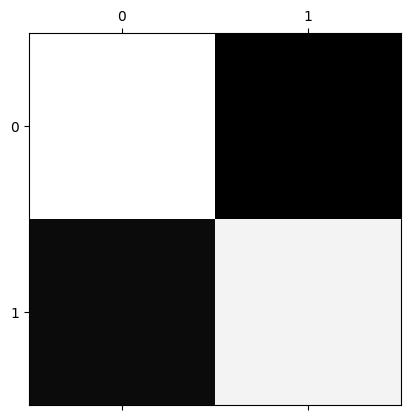





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.9508070714834742
Fold: 2 ----> Validation Score: 0.9561875480399693
Fold: 3 ----> Validation Score: 0.9558032282859339
Fold: 4 ----> Validation Score: 0.95695618754804
Fold: 5 ----> Validation Score: 0.9577085736255286
Fold: 6 ----> Validation Score: 0.9565551710880431
Fold: 7 ----> Validation Score: 0.9607843137254902
Fold: 8 ----> Validation Score: 0.954248366013072
Fold: 9 ----> Validation Score: 0.9480968858131488
Fold: 10 ----> Validation Score: 0.9573241061130334


In [135]:
evaluate_model(model,X_train, X_test, y_train, y_test, 10)

Below are the ROC AUC outcomes for the model.
>  - Accuracy score on testing dataset: 0.9709497206703911
>  - ROC AUC Score on testing dataset: 0.9797001095010951
>  - Accuracy score on training dataset: 0.9603674944260783
>  - ROC AUC Score on training dataset: 0.9960869962037167

- Classification Report
- Confusion Matrix
- Please also see **the** KFold validation scores where K =10.

- We can clearly see that output values are almost similar for both training and test data. Hence we can conclude that our model is not either ***over fitted or under fitted.***



KNN classification

In [136]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [138]:
crs_valid_cnt =3
model_gs = train_knn_model_GridsearchCV(X_train,y_train,crs_valid_cnt)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [139]:
print(model_gs.best_params_)
print(model_gs.best_score_)
# train_KNNClassifier_final

{'n_neighbors': 2}
0.977319897211485


In [140]:
import json
import sys

# load the data into an element
rf_best_param = model_gs.best_params_

# dumps the json object into an element
json_str = json.dumps(rf_best_param)

# load the json to a string
resp = json.loads(json_str)

# print the resp
print(resp)

# extract an element in the response
n_neighbors =resp['n_neighbors']
model = train_KNNClassifier_final(X_train,y_train, n_neighbors)


{'n_neighbors': 2}


Model trained with training dataset
Accuracy score on testing dataset: 0.9650837988826816
ROC AUC Score on testing dataset: 0.933040267902679
Accuracy score on training dataset: 0.9974629045898362
ROC AUC Score on training dataset: 0.9999130049547987




Classification report on Testing dataset:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.78      0.87      0.82       328

    accuracy                           0.97      3580
   macro avg       0.88      0.92      0.90      3580
weighted avg       0.97      0.97      0.97      3580






Confusion Matrix: 
[[12640   367]
 [  223 12784]]


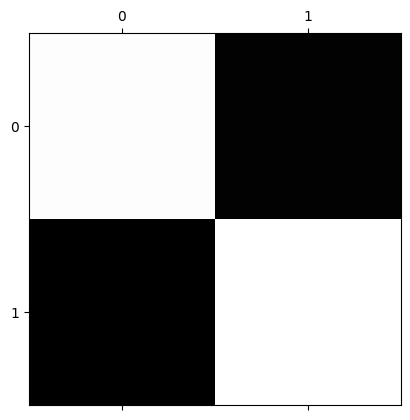





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.9830899308224442
Fold: 2 ----> Validation Score: 0.9842428900845503
Fold: 3 ----> Validation Score: 0.9792467332820907
Fold: 4 ----> Validation Score: 0.9777094542659492
Fold: 5 ----> Validation Score: 0.9819300269127259
Fold: 6 ----> Validation Score: 0.9815455594002307
Fold: 7 ----> Validation Score: 0.9807766243752403
Fold: 8 ----> Validation Score: 0.9823144944252211
Fold: 9 ----> Validation Score: 0.9769319492502884
Fold: 10 ----> Validation Score: 0.9765474817377932


In [141]:
evaluate_model(model,X_train, X_test, y_train, y_test, 10)

In [142]:
error = []
for i in range(1,50):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  y_pred_i = classifier.predict(X_test)
  error.append(np.mean(y_pred_i!= y_test))

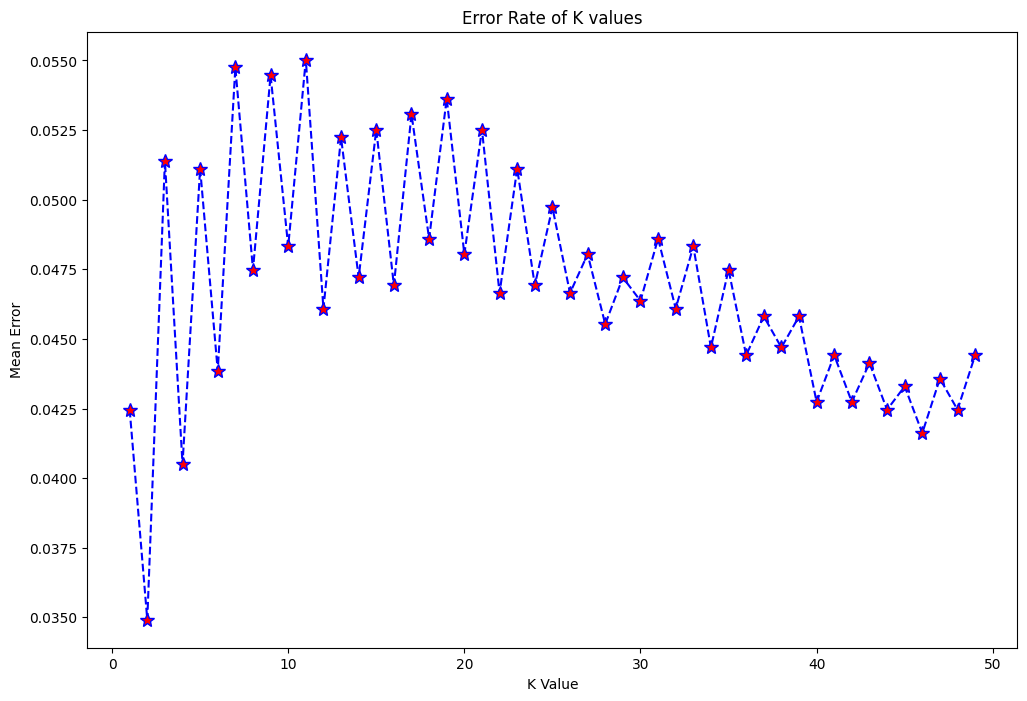

In [143]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50), error, color= 'blue', linestyle= 'dashed', marker= '*',
         markerfacecolor='red', markersize= 10)
plt.title('Error Rate of K values')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()